In [13]:
import os
os.chdir("../../../")

In [14]:
import torch
from torchts.nn.models.ode import ODESolver
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [41]:
# Duffing equation: Second order ODE system
dt = 0.01

def x_prime(prev_val, coeffs):
    return prev_val["x_"]

def x_prime_prime(prev_val, coeffs):
    return coeffs["g"]*torch.cos(coeffs["w"]*prev_val["t"]) - coeffs["d"]*prev_val["x_"] - coeffs["a"]*prev_val["x"] - coeffs["b"]*prev_val["x"]*prev_val["x"]*prev_val["x"]

def t_prime(prev_val, coeffs):
    return dt

ode = {"x": x_prime, "x_": x_prime_prime, "t": t_prime}

# Initial conditions [0,0,0]
ode_init = {"x": 0, "x_": 0, "t": 0}

# Constants (Parameters)
ode_coeffs = {"a": 0.1, "b": 0.5, "d": 0.2, "g": 0.8, "w": 0.5}


# 4th Order Runge-Kutta - Data Generation

In [42]:
ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=None
)

result = ode_solver(1000)

Coeffs:  {'a': Parameter containing:
tensor(0.1000, requires_grad=True), 'b': Parameter containing:
tensor(0.5000, requires_grad=True), 'd': Parameter containing:
tensor(0.2000, requires_grad=True), 'g': Parameter containing:
tensor(0.8000, requires_grad=True), 'w': Parameter containing:
tensor(0.5000, requires_grad=True)}


In [43]:
result

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.9973e-05, 7.9920e-03, 1.0000e-04],
        [1.5979e-04, 1.5968e-02, 2.0000e-04],
        ...,
        [7.7501e-01, 1.1140e-01, 9.9701e-02],
        [7.7615e-01, 1.1605e-01, 9.9801e-02],
        [7.7733e-01, 1.2069e-01, 9.9901e-02]], grad_fn=<StackBackward>)

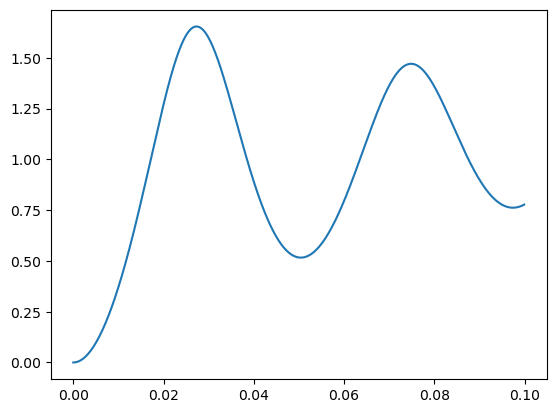

In [44]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(result_np[:,2], result_np[:,0])

plt.show()

# Euler's method for training

In [51]:
ode_train_coeffs = {"a": 0., "b": 0., "d": 0., "g": 0., "w": 0.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

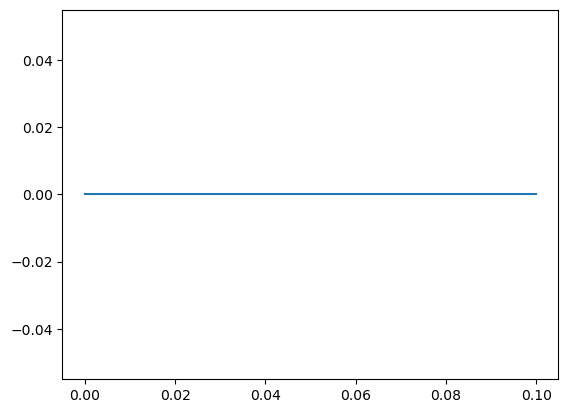

In [52]:
results_test = ode_solver_train(1000)
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(results_test_np[:,2], results_test_np[:,0])

plt.show()

In [53]:
ode_solver_train.fit(
    result,torch.optim.Adam,
    {"lr": 0.1},
    max_epochs=100
)

n:  1000
Epoch: 0	 Loss: tensor(0.4499, grad_fn=<MseLossBackward>)
Epoch: 1	 Loss: tensor(1.1035, grad_fn=<MseLossBackward>)
Epoch: 2	 Loss: tensor(0.2227, grad_fn=<MseLossBackward>)
Epoch: 3	 Loss: tensor(0.3194, grad_fn=<MseLossBackward>)
Epoch: 4	 Loss: tensor(0.3879, grad_fn=<MseLossBackward>)
Epoch: 5	 Loss: tensor(0.4162, grad_fn=<MseLossBackward>)
Epoch: 6	 Loss: tensor(0.4207, grad_fn=<MseLossBackward>)
Epoch: 7	 Loss: tensor(0.4132, grad_fn=<MseLossBackward>)
Epoch: 8	 Loss: tensor(0.4000, grad_fn=<MseLossBackward>)
Epoch: 9	 Loss: tensor(0.3844, grad_fn=<MseLossBackward>)
Epoch: 10	 Loss: tensor(0.3682, grad_fn=<MseLossBackward>)
Epoch: 11	 Loss: tensor(0.3524, grad_fn=<MseLossBackward>)
Epoch: 12	 Loss: tensor(0.3375, grad_fn=<MseLossBackward>)
Epoch: 13	 Loss: tensor(0.3237, grad_fn=<MseLossBackward>)
Epoch: 14	 Loss: tensor(0.3110, grad_fn=<MseLossBackward>)
Epoch: 15	 Loss: tensor(0.2993, grad_fn=<MseLossBackward>)
Epoch: 16	 Loss: tensor(0.2886, grad_fn=<MseLossBackward>

In [54]:
ode_solver_train.coeffs

# The coefficients differ by at most 0.1 from the original with the exception of "w". THe graphs look similar.
# TODO: Investigate why "w" isn't learning

{'a': Parameter containing:
 tensor(0.2094, requires_grad=True),
 'b': Parameter containing:
 tensor(0.5433, requires_grad=True),
 'd': Parameter containing:
 tensor(0.2215, requires_grad=True),
 'g': Parameter containing:
 tensor(0.8145, requires_grad=True),
 'w': Parameter containing:
 tensor(0., requires_grad=True)}

# Re-calculate using 4th Order Runge-Kutta

In [55]:
results_test = ode_solver_train(1000)
results_test

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 8.1448e-03, 1.0000e-04],
        [8.1448e-05, 1.6272e-02, 2.0000e-04],
        ...,
        [7.2694e-01, 1.4097e-01, 9.9701e-02],
        [7.2835e-01, 1.4519e-01, 9.9801e-02],
        [7.2980e-01, 1.4939e-01, 9.9901e-02]], grad_fn=<StackBackward>)

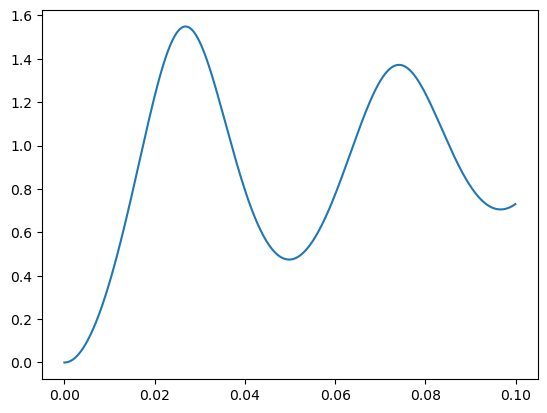

In [56]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,2], results_test_np[:,0])

plt.show()